# Price Prediction of Used Cars based on features of Car

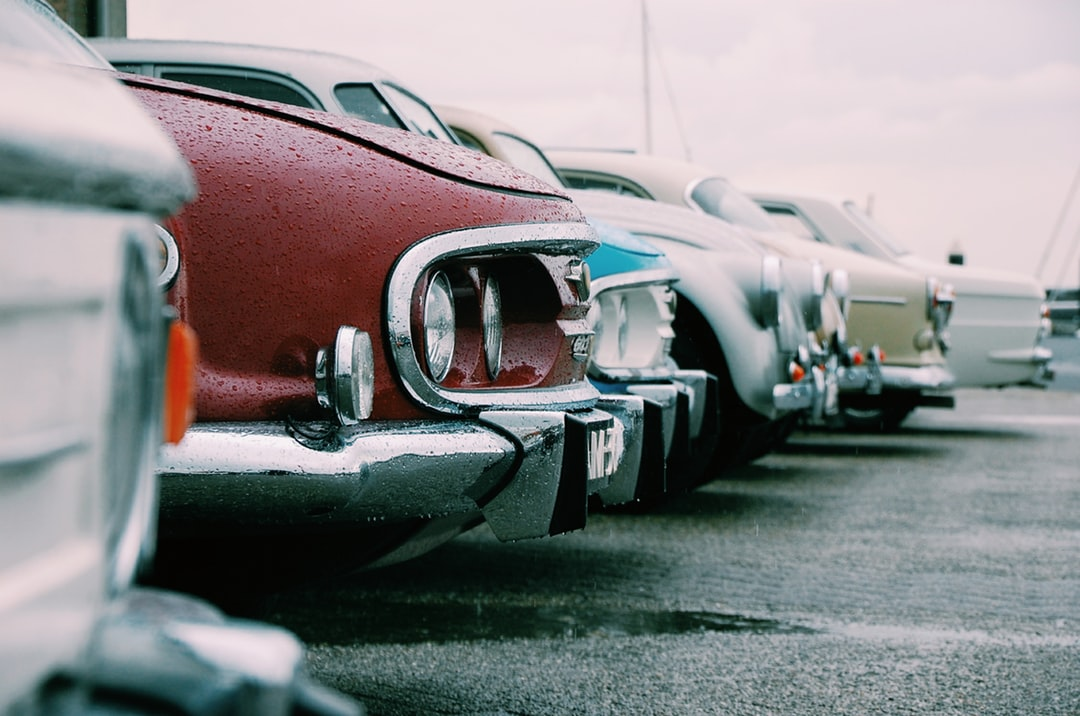

### Craiglist is the world's largest collection of used vehicles for sale.

### This data is scraped every few months, it contains most all relevent information that Craiglist provides on car sales including columns like price, condition, manufacturer, and 16 other categories.

## Contributors:
##### Sandeep Date  
##### Sushrut Dhadwe  
##### Nikhil Bhoyar  
##### Shrikant Panda

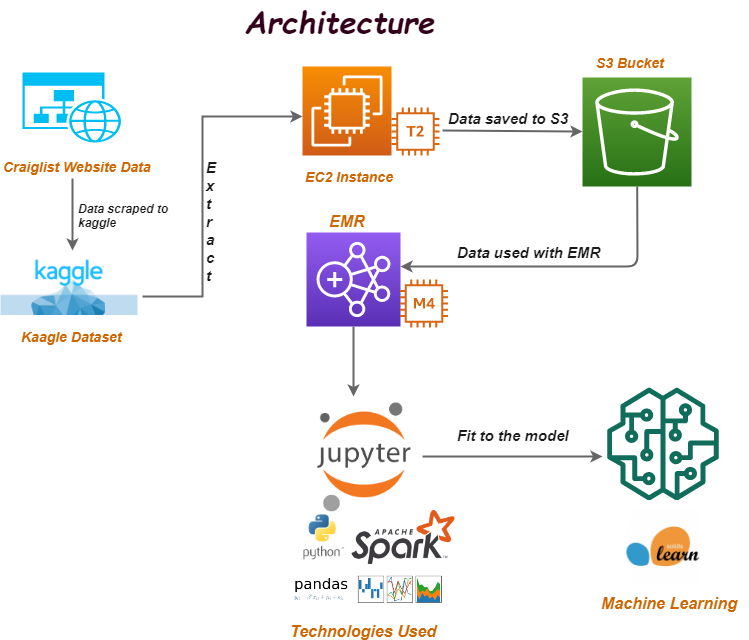

Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [59]:
sns.set(style='dark')
sns.set_context("poster",font_scale=1.5)

Load the data into dataframe

In [6]:
data=pd.read_csv("E:\\DBDA\\Project\\NEWDATASET\\merged.csv")
nondata=pd.read_csv("E:\\DBDA\\Project\\NEWDATASET\\merged.csv")

# Lets get the Information about the available features:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270829 entries, 0 to 2270828
Data columns (total 20 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
dtypes: float64(4), int64(1), object(15)
memory usage: 346.5+ MB


In [4]:
data.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,lat,long
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064


As we can see there are many Nan values in data we can find percenatge of null values present in each column

### To begin exploratory data analysis, we will be using matplotlib and seaborn libraries for plotting the data.
Depending on the data, all plots will be made. 

C:\Users\sande\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\sande\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


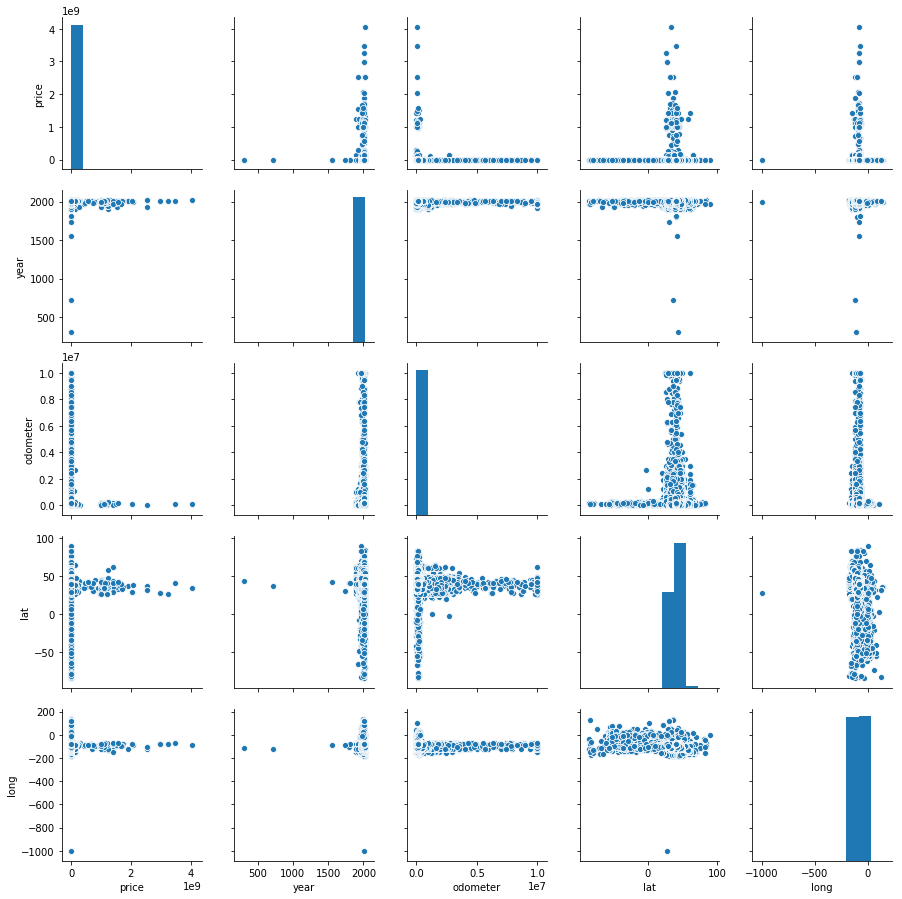

In [5]:
sns.pairplot(data)

In [6]:
perccount=(1-data.count()/len(data))*100

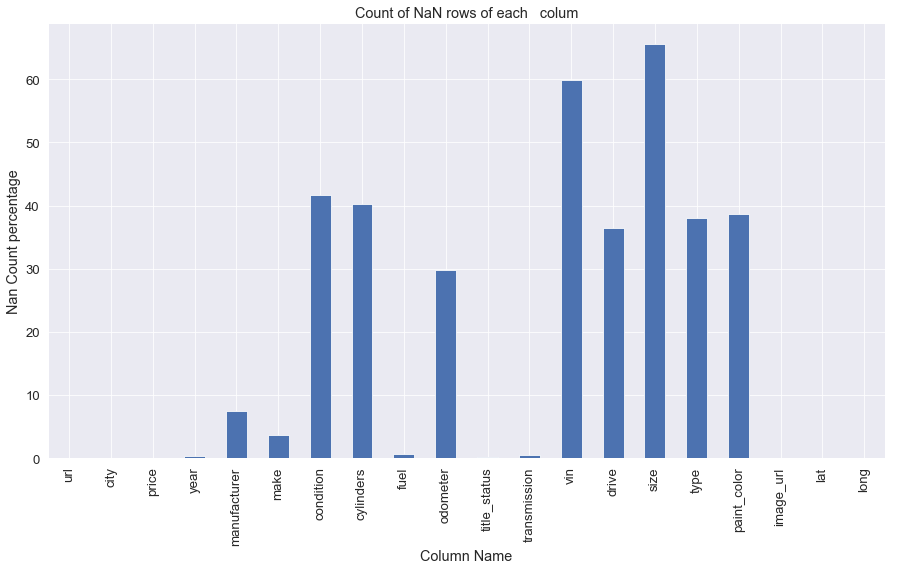

In [9]:
plt.figure(figsize =(15,8))
perccount.plot.bar()
plt.title('Count of NaN rows of each   colum')
plt.xlabel('Column Name')
plt.ylabel('Nan Count percentage')
plt.show()

As now we have come to know from above information that vin and size columns contain more null values i.e. 59% and 65% respectively. 
Vin is vehicle identification number if this column is dropped it wont affect at all but for size column it can affect the model .But we are not considering these columns as it will increase inconsistency in the data.


Now we can also count the number of rows which contains NaN  as follow,

In [10]:
nacount = len(data)-data.count()
nacount

url                   0
city                  0
price                 0
year               7366
manufacturer     168158
make              82241
condition        944979
cylinders        914390
fuel              14715
odometer         677958
title_status       5575
transmission      12931
vin             1359868
drive            829316
size            1488924
type             865104
paint_color      878141
image_url             5
lat                 926
long                926
dtype: int64

In [12]:
data=data.drop(['vin','size'],axis=1)

Columns like url , image_url contains url link of car inforamtion and images.
we are going to use other features of car such as condition, year, odometer etc. for our analysis, url links will be no useful for the analysis,so can be dropped

In [11]:
data=data.drop(['url','image_url'],axis=1)

In [12]:
data=data.drop(['lat','long'],axis=1)

In [13]:
print("new data information:")
data.info()

new data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270829 entries, 0 to 2270828
Data columns (total 16 columns):
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
dtypes: float64(2), int64(1), object(13)
memory usage: 277.2+ MB


# So New dataset will look like:

In [14]:
display(data.head())

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN


# Lets Understand the Price column of the dataset

In [15]:
print("Statistics of price column is: ")
display(data.price.describe())
#pd.options.display.float_format = "{:f}".format

Statistics of price column is: 


count    2.270829e+06
mean     1.069232e+05
std      1.179830e+07
min      0.000000e+00
25%      3.400000e+03
50%      7.500000e+03
75%      1.558500e+04
max      4.045085e+09
Name: price, dtype: float64

lets also understand by plotting box plot of price column:


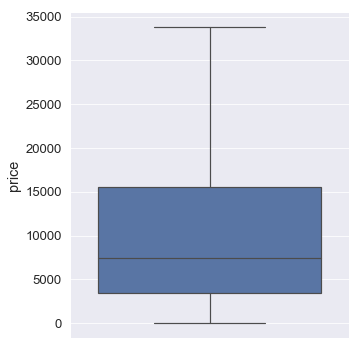

In [16]:
print("lets also understand by plotting box plot of price column:")
plt.figure(figsize =(5,6))
sns.boxplot(y='price',data=data,showfliers = False)
plt.show()

As we understood from above summary and box plot that the minimum value in price column is zero and huge max value as 4045085454

we shouldnt be swayed by some of the figures above. we found that in price column there is lot of dirty values such as $1,000,000 Ferrari and a 1,000,000,000 chevy, which is not correct. we have searched average car price from the website [ref from  mediaroom.kbb.com] for average car values year wise.

User might have forgot to put decimal point. For e.g. Jeep wrangler Rubicon 2014 starts around 35000. But price entered is 320000.

And also some Ford F350 cab price starts 34,000 but price entered is $1, many such values of car is entered by user.

In [68]:
fff=data.apply(lambda x: str(x['manufacturer'])+" "+str(x['make']),axis=1)

In [17]:
dirt=data[(data['price'] > 150000)]
dirt.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color
618,mcallen,1818181,2006.0,honda,pilot,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,black
619,mcallen,242424,2013.0,nissan,frontier,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,blue
1254,kansascity,987654,1947.0,ford,coe,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,NaN
2936,jxn,1234567890,2000.0,ford,ranger xlt,fair,6 cylinders,gas,179000.0,clean,automatic,NaN,4wd,mid-size,pickup,black
3066,nanaimo,159999,2010.0,ferrari,california,like new,NaN,gas,17030.0,clean,automatic,ZFF65LJA9A0172891,rwd,NaN,convertible,NaN


In [18]:
comp = data[(data['manufacturer'] == 'jeep') & (data['price'] == 320000)]
comp

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color
642468,monterey,320000,2014.0,jeep,wrangler rubicon 4wd,excellent,4 cylinders,gas,NaN,clean,automatic,NaN,4wd,NaN,SUV,black


We can see few examples of variations by below graph:


For example we can see for manufaturers variations in price as:
WebPrice shows the actual price whereas Price shows Dirty values enterd by user


<Figure size 2160x2160 with 0 Axes>

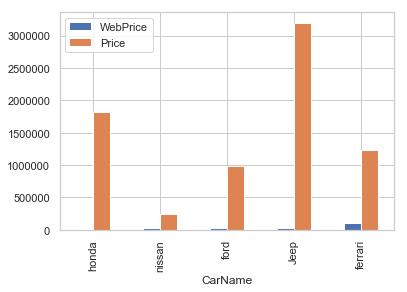

In [28]:
print("\nFor example we can see for manufaturers variations in price as:\nWebPrice shows the actual price whereas Price shows Dirty values enterd by user")
web=pd.DataFrame({'CarName':['honda','nissan','ford','Jeep','ferrari'],'WebPrice':[10000,25000,20000,32000,100000],'Price':[1818181,242424,987654,3200000,1234560]})
plt.figure(figsize =(30,30))
web.plot(x='CarName',y=['WebPrice','Price'],kind='bar')
plt.show()

In [4]:
print("Based on website data and above summary, we can consider that,\nvalues are entered above 150000 by user are not proper.\n")
print("We can also count such values as follow:")
dprice=data[data.price > 150000].count()
print("\nCount of car above 150000:", dprice['price'])
gprice=data[data.price < 150000].count()
print("\nCount of car below 150000:",gprice['price'])

Based on website data and above summary, we can consider that,
values are entered above 150000 by user are not proper.

We can also count such values as follow:

Count of car above 150000: 1604

Count of car below 150000: 2269188


There are not many rows in data which are affected by wrong input of price by the user so we can drop the values above $150000

In [31]:
data.drop(data[data.price > 150000].index, inplace = True)

In [32]:
print("Number of rows and column after removal is:",data.shape)

Number of rows and column after removal is: (2269225, 16)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A14E03278>]],
      dtype=object)

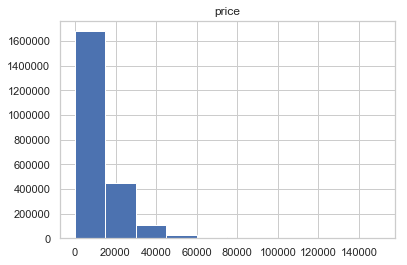

In [34]:
data.hist(column='price')

Also let's check is data entered by user for price is zero not.

In [35]:
pricec=data[data.price == 0].count()
print("count of rows where price is zero:", pricec['price'])

count of rows where price is zero: 45855


As our analysis is based on price of car we can not consider the rows where price is zero, so we have to drop such rows also.

In [36]:
data.drop(data[data.price == 0].index, inplace = True)

In [37]:
data.shape

(2223370, 16)

In [38]:
data['manufacturer'].fillna("unknown",inplace = True)
print("Number of Different manufactureres of car is:\n", data['manufacturer'].nunique())
print("\n")
print("Types of manufacturers of car are:\n", data['manufacturer'].unique())

Number of Different manufactureres of car is:
 54


Types of manufacturers of car are:
 ['dodge' 'unknown' 'ford' 'gmc' 'jeep' 'bmw' 'chev' 'chevrolet' 'hyundai'
 'honda' 'ram' 'acura' 'kia' 'volkswagen' 'nissan' 'audi' 'mercedes-benz'
 'subaru' 'chrysler' 'toyota' 'rover' 'mazda' 'chevy' 'cadillac'
 'mercedes' 'infiniti' 'lexus' 'mini' 'saturn' 'vw' 'lincoln' 'mitsubishi'
 'buick' 'mercury' 'fiat' 'pontiac' 'volvo' 'jaguar' 'datsun' 'infinity'
 'harley' 'alfa' 'ferrari' 'porche' 'noble' 'land rover' 'landrover'
 'harley-davidson' 'alfa-romeo' 'mercedesbenz' 'aston' 'aston-martin'
 'morgan' 'hennessey']


In [39]:
data.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,automatic,NaN,rwd,NaN,coupe,red
1,marshall,1515,1999.0,unknown,fleetwood,NaN,NaN,gas,NaN,clean,other,NaN,NaN,NaN,NaN,NaN
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,automatic,1FAFP55UO4G113464,fwd,full-size,sedan,grey
4,marshall,400,2001.0,unknown,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN


In [83]:
print(data.corr())

             price      year  odometer
price     1.000000  0.273293 -0.231557
year      0.273293  1.000000 -0.187352
odometer -0.231557 -0.187352  1.000000


# Now lets Understand Manufacturer Column

In [40]:
data['manufacturer'].fillna("unknown",inplace = True)
print("Number of Different manufactureres of car is:\n", data['manufacturer'].nunique())
print("\n")
print("Types of manufacturers of car are:\n", data['manufacturer'].unique())

Number of Different manufactureres of car is:
 54


Types of manufacturers of car are:
 ['dodge' 'unknown' 'ford' 'gmc' 'jeep' 'bmw' 'chev' 'chevrolet' 'hyundai'
 'honda' 'ram' 'acura' 'kia' 'volkswagen' 'nissan' 'audi' 'mercedes-benz'
 'subaru' 'chrysler' 'toyota' 'rover' 'mazda' 'chevy' 'cadillac'
 'mercedes' 'infiniti' 'lexus' 'mini' 'saturn' 'vw' 'lincoln' 'mitsubishi'
 'buick' 'mercury' 'fiat' 'pontiac' 'volvo' 'jaguar' 'datsun' 'infinity'
 'harley' 'alfa' 'ferrari' 'porche' 'noble' 'land rover' 'landrover'
 'harley-davidson' 'alfa-romeo' 'mercedesbenz' 'aston' 'aston-martin'
 'morgan' 'hennessey']


# Lets see Count of Cars of each Manufacturer:

In [85]:
sns.set(style='dark')
sns.set_context("poster",font_scale=0.8)

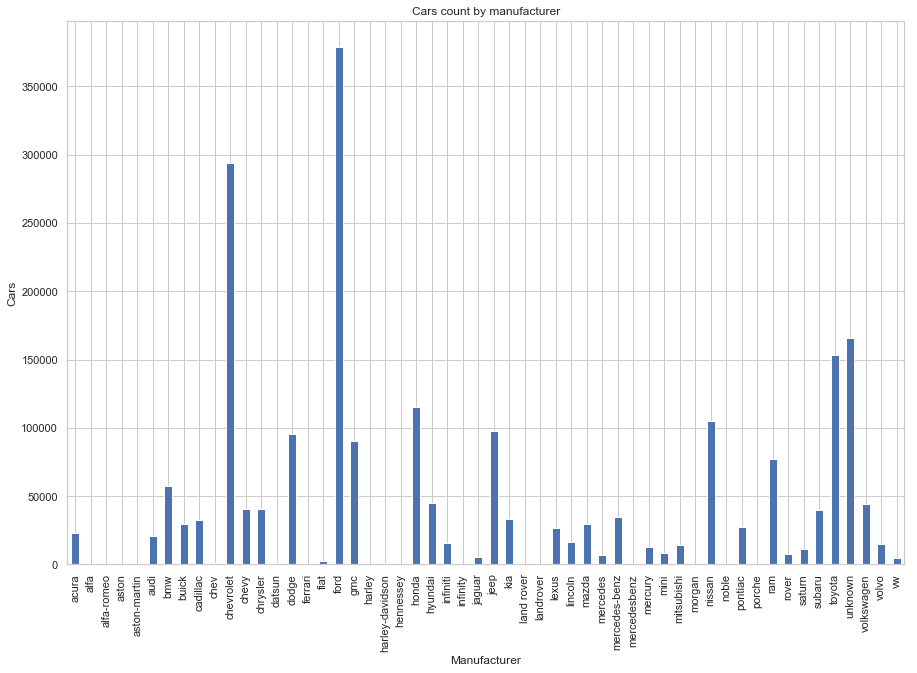

In [41]:
plt.figure(figsize =(15,10))
manf= data['manufacturer'].groupby(data.manufacturer).count()
manf.plot.bar()
#pmanf.plot()
plt.title('Cars count by manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Cars')
plt.show()
#plt.legend()

condition
excellent    12257.928876
fair          2547.007343
good          7729.183541
like new     16698.929178
new          26605.415207
salvage       2429.783807
unknown      12730.194672
Name: price, dtype: float64


Text(0,0.5,'price')

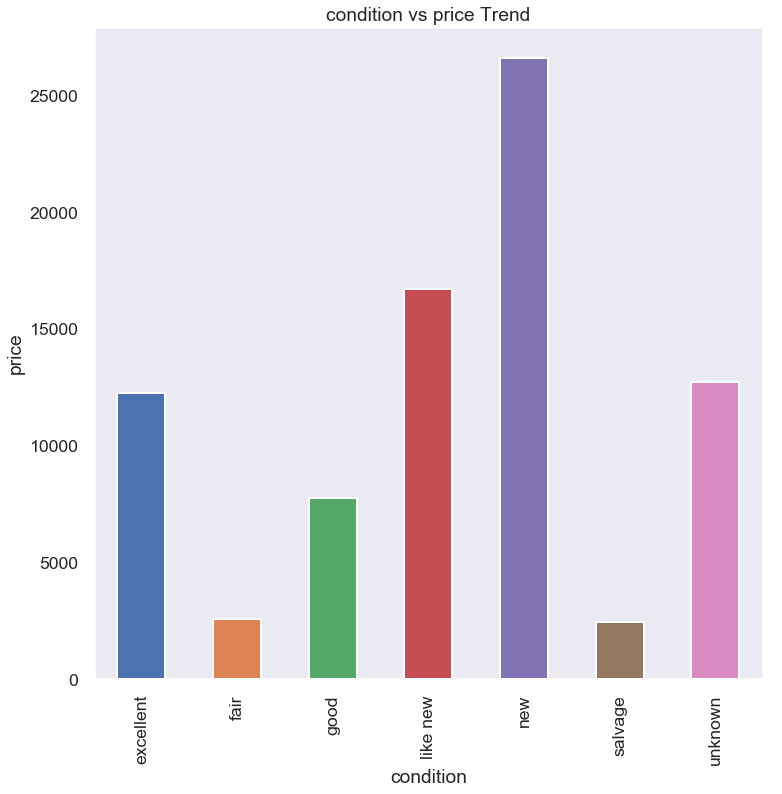

In [87]:
plt.figure(figsize =(12,12))
data['condition'].fillna("unknown",inplace = True)
condition=data['price'].groupby(data.condition).mean()
print(condition)
condition.plot.bar()
plt.title('condition vs price Trend')
plt.ylabel('price')

It can be conclude from above graph the data shows that if the car's condition is 'new' and 'like new' then the price is high, which is quite obvious similar conclusion can be taken for other conditions of car.
The 'unknown' condition is nan values in condition column which can be replaced by looking at 'year','odometer' columns.

In [111]:
sns.set(style='whitegrid')
 

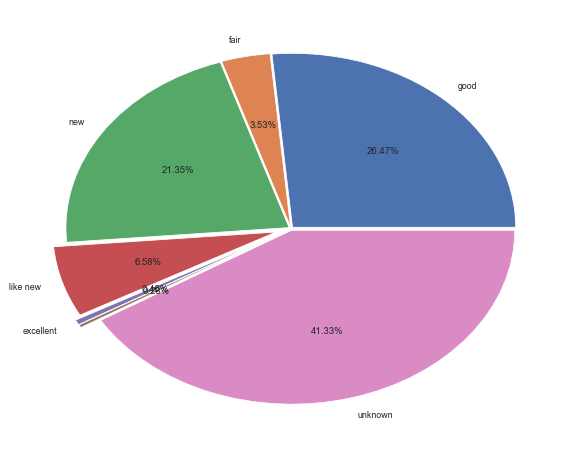

In [113]:
plt.figure(figsize =(10,8))
conditionc=data['condition'].groupby(data.condition).count()
#conditionc.plot.pie()
plt.pie(conditionc,labels=['good','fair','new','like new','excellent','','unknown'],autopct='%1.2f%%',explode=[0.01,0.01,0.01,0.07,0.10,0.10,0.01])
plt.show()
#conditionc.plot.pie()   

above graph shows the percentage of cars available as per the conditon of cars

count of cars by type of Fuel


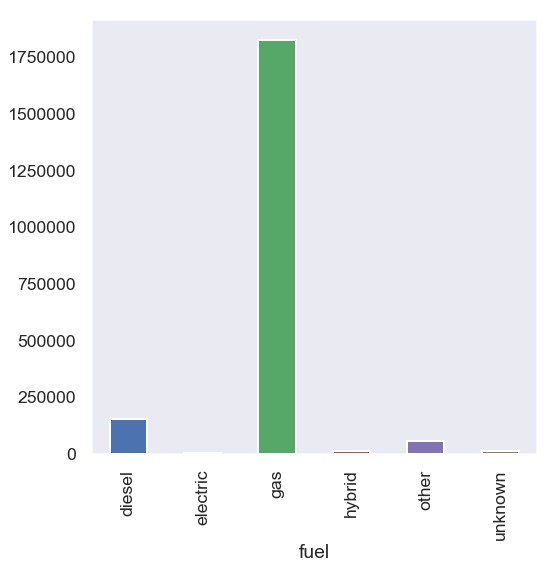

In [97]:
print("count of cars by type of Fuel")
plt.figure(figsize =(8,8))
data['fuel'].fillna("unknown",inplace = True)
condfuel=data['fuel'].groupby(data.fuel).count()
condfuel.plot.bar()
plt.show()

# Now lets understand the year column

lets see price distribution as per year:

In [91]:
condyear=data['price'].groupby(data.year).mean()
print(condyear)

year
302.0      2900.000000
718.0      2900.000000
1553.0     2900.000000
1740.0     2900.000000
1796.0     2900.000000
1813.0     2900.000000
1900.0     4077.334694
1901.0     2231.482759
1902.0     5319.111111
1903.0     2015.750000
1904.0    15000.000000
1905.0    28497.500000
1906.0    27500.500000
1907.0     1000.000000
1908.0     8975.000000
1909.0      522.500000
1910.0     2818.000000
1911.0    12126.200000
1912.0    21333.333333
1913.0    42203.666667
1914.0    14934.666667
1915.0    16614.647059
1916.0    13932.777778
1917.0     9713.636364
1918.0    11821.826087
1919.0     8455.611111
1920.0     6269.677419
1921.0    10109.909091
1922.0    10795.961538
1923.0    13997.317808
              ...     
1991.0     4853.584620
1992.0     4489.725513
1993.0     4784.509759
1994.0     4011.075210
1995.0     4298.529801
1996.0     4100.696203
1997.0     4174.326026
1998.0     3734.674702
1999.0     4399.779661
2000.0     4325.343225
2001.0     4471.910975
2002.0     4641.197763
2003.0

As above we can see there are many year values entered by user are wrong such as values entered less than 1900
We are not going to consider cars whose year less than 1990.

As these cars are considered as Vintage cars and usually to resell these cars price is decided through autctions.
Also price of such cars does not depend on their features such as odometer, cylinders, fuel type etc. 

So, we are only going to consider cars whose year is greater than 1990

In [114]:
yearc=data[data.year < 1990.0].count()
print("Count of rows whose year is less than 1990:",yearc['year'])
yearc1=data[data.year > 2019.0].count()
print("Count of rows whose year is greater than 2019:",yearc1['year'])
data.shape

Count of rows whose year is less than 1990: 0
Count of rows whose year is greater than 2019: 0


(2070752, 14)

In [48]:
#eddata = data
data.drop(data[data.year < 1990.0].index, inplace = True)
data.drop(data[data.year > 2019.0].index, inplace = True)


In [94]:
data.shape

(2070752, 14)

[2010. 1999. 2008. 2004. 2001. 2007. 2015. 2018. 2003. 2006. 2002. 2016.
 2011. 2017. 2014. 2013. 2012. 2009. 2005. 1991. 2000. 2019. 1995. 1998.
 1996. 1993. 1994. 1990. 1997. 1992.   nan]


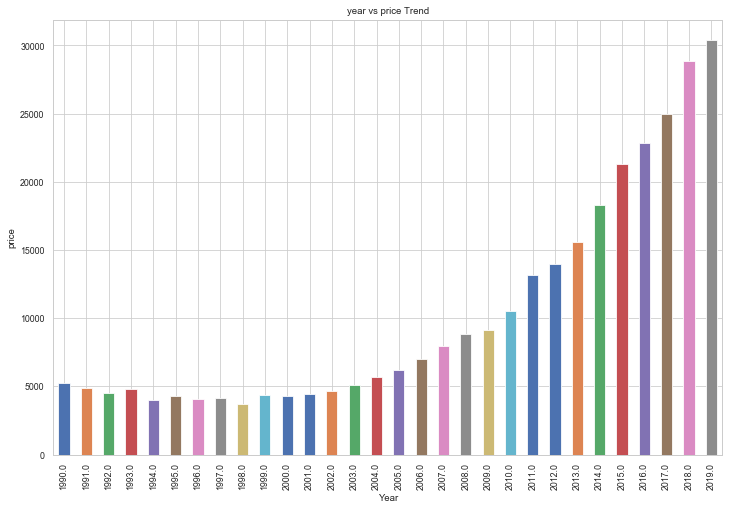

In [115]:
plt.figure(figsize =(12,8))
#data['condition'].fillna("unknown",inplace = True)
print(data['year'].unique())
condp=data['price'].groupby(data.year).mean()
#condp= data.groupby(data.year.price).mean()
#print(condp)
condp.plot.bar()
#plt.bar(condp['year'], condp[1])
plt.title('year vs price Trend')
plt.xlabel('Year')
plt.ylabel('price')
plt.show()

Now lets understand Title staus column

In [116]:
print("Different title status in data are,")
print(data['title_status'].unique())

Different title status in data are,
['clean' 'rebuilt' 'lien' 'missing' 'salvage' 'parts only' nan]


In [117]:
print("mean price as per title status of car:")
condtit=data['price'].groupby(data.title_status).mean()
print(condtit)

mean price as per title status of car:
title_status
clean         11609.027196
lien          17906.740082
missing        2044.325435
parts only     1815.047956
rebuilt        9433.247314
salvage        7095.989802
Name: price, dtype: float64


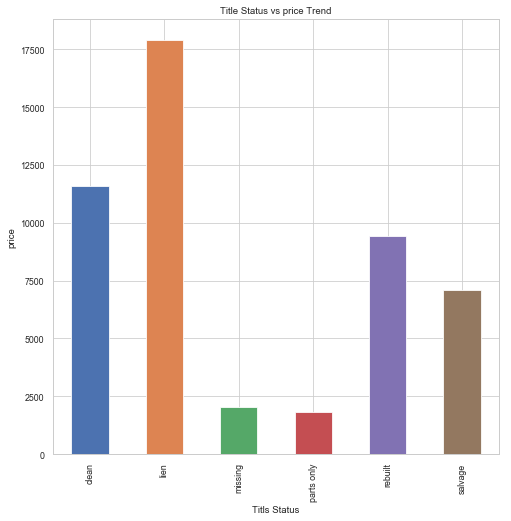

In [118]:
plt.figure(figsize =(8,8))
condtit.plot.bar()
plt.title('Title Status vs price Trend')
plt.xlabel('Titls Status')
plt.ylabel('price')
plt.show()

count cars as per title status


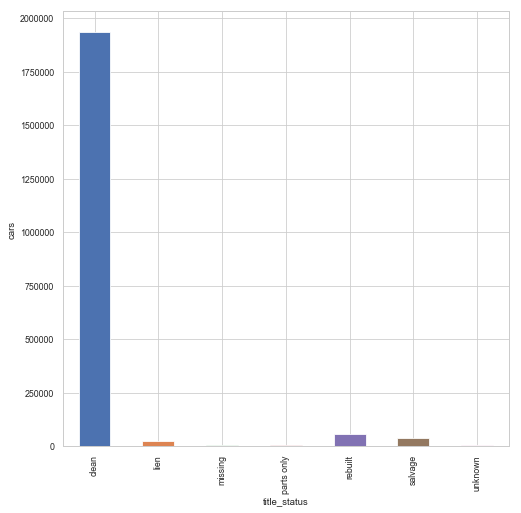

In [119]:
print("count cars as per title status")
plt.figure(figsize =(8,8))
data['title_status'].fillna("unknown",inplace = True)
titcount=data['title_status'].groupby(data.title_status).count()
plt.xlabel('Titls Status')
plt.ylabel('cars')
titcount.plot.bar()#labels=['clean' 'rebuilt' 'lien' 'missing' 'salvage' 'parts only','na'],autopct='%1.2f%%',explode=[0.01,0.01,0.01,0.07,0.10,0.10,0.01])
plt.show()

In [55]:
print("Number of Cities:",len(data['city'].unique()))

Number of Cities: 865


[]

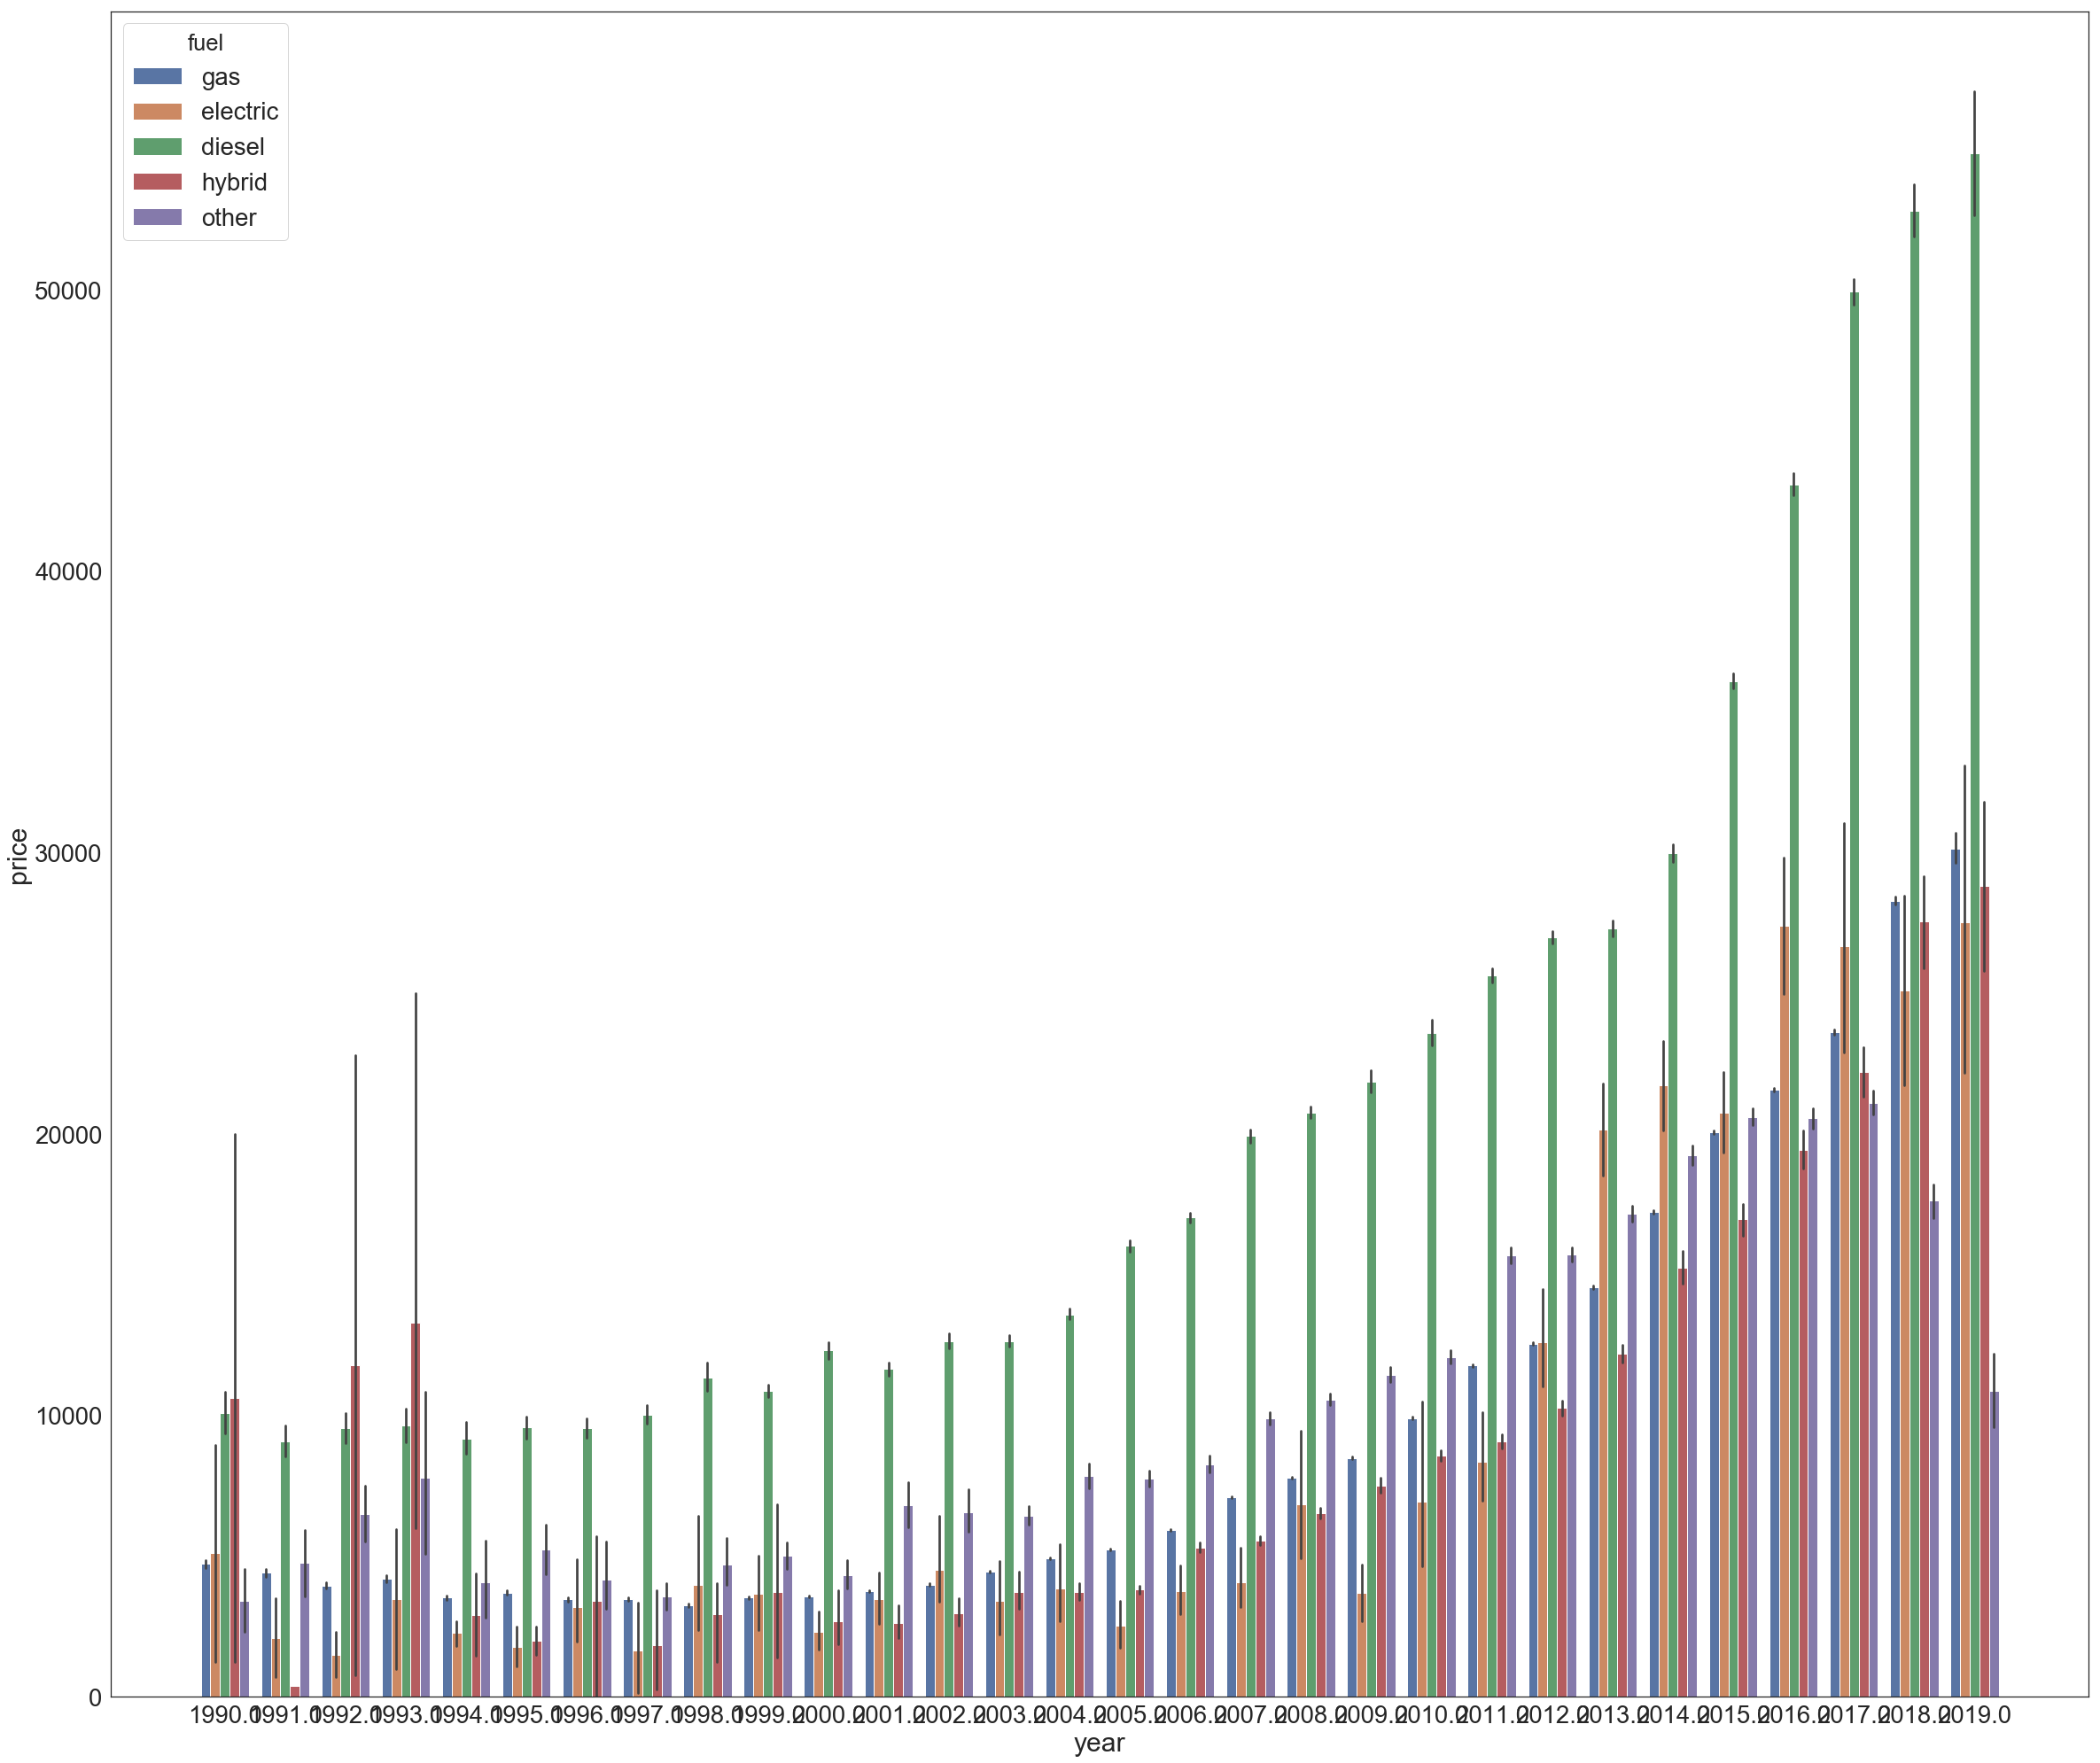

In [49]:
plt.figure(figsize =(40,35))
sns.barplot(x='year',y='price',data=data, hue = 'fuel')
plt.plot()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

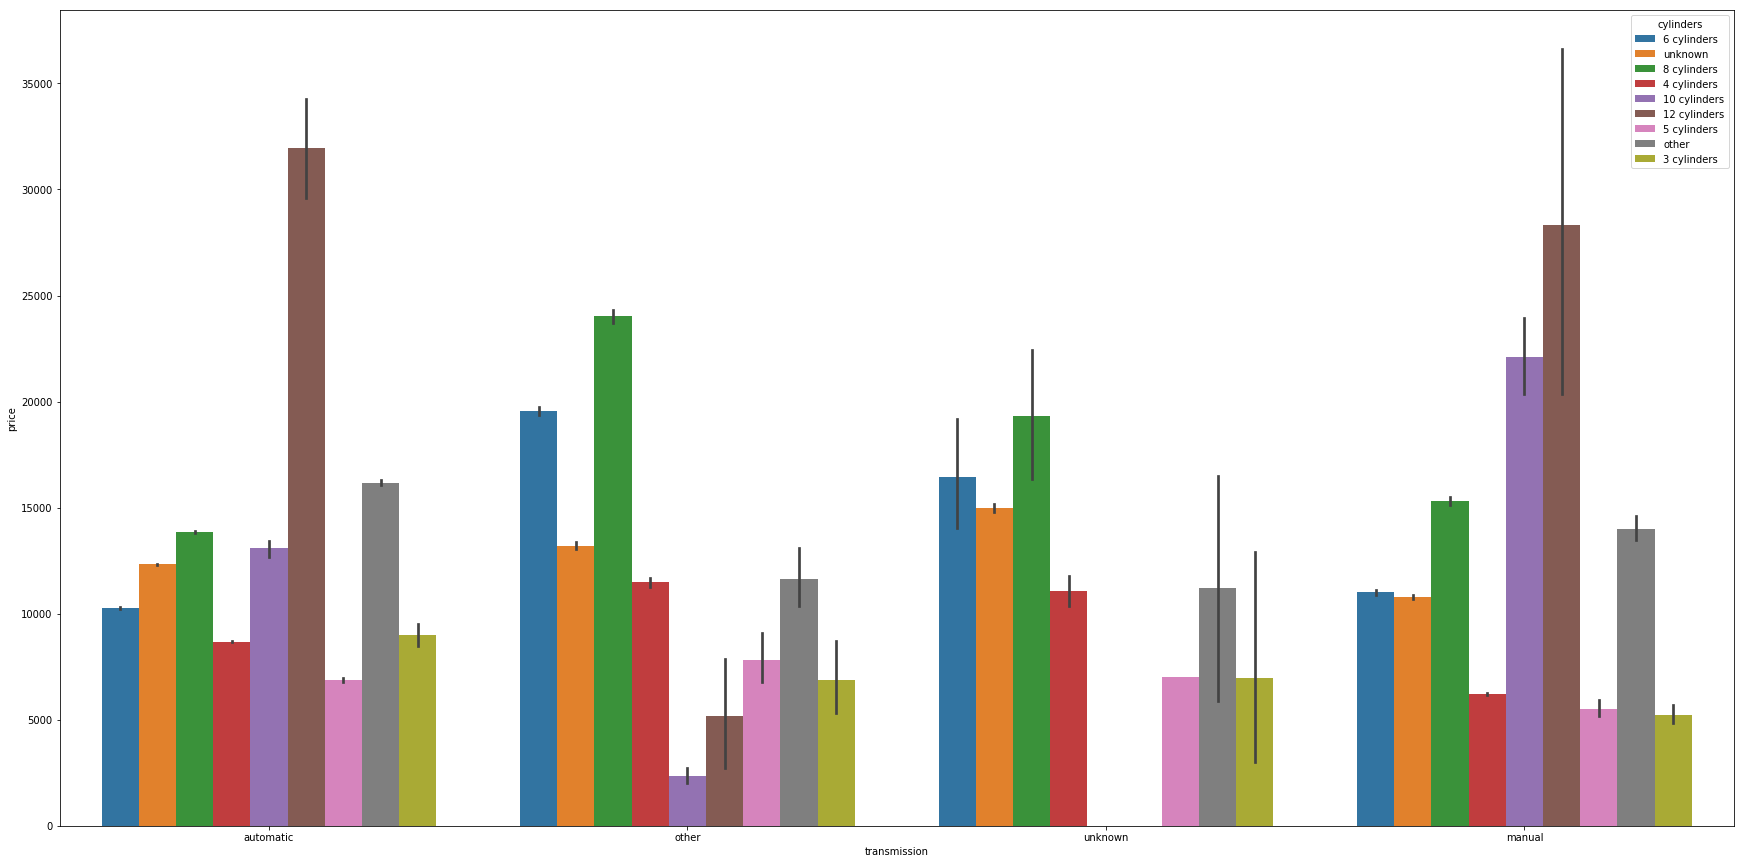

In [74]:
plt.figure(figsize =(30,15))
sns.barplot(x='transmission',y='price',data=data, hue = 'cylinders')
plt.title('Transmission with cylinders VS Price')
plt.show()

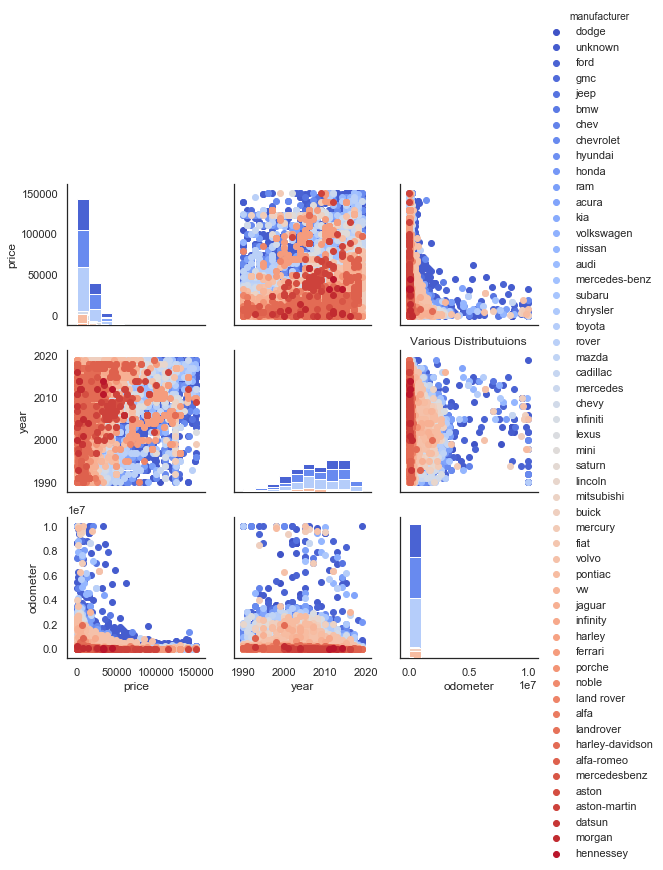

In [58]:
y = sns.PairGrid(data,hue='manufacturer',palette='coolwarm')
y = y.map_diag(plt.hist)
y = y.map_offdiag(plt.scatter)
y = y.add_legend()
plt.title('Various Distributuions')
plt.show()

In [16]:
nondata=nondata.dropna()

In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
nondata['manufacturer']=le.fit_transform(nondata['manufacturer'])
#ggg=le.get_params(deep)
#print(ggg)
nondata['cylinders']=le.fit_transform(nondata['cylinders'])
nondata['fuel']=le.fit_transform(nondata['fuel'])
nondata['title_status']=le.fit_transform(nondata['title_status'])
nondata['transmission']=le.fit_transform(nondata['transmission'])
nondata['drive']=le.fit_transform(nondata['drive'])
nondata['type']=le.fit_transform(nondata['type'])
nondata['paint_color']=le.fit_transform(nondata['paint_color'])
nondata['make']=le.fit_transform(nondata['make'])
nondata['condition']=le.fit_transform(nondata['condition'])

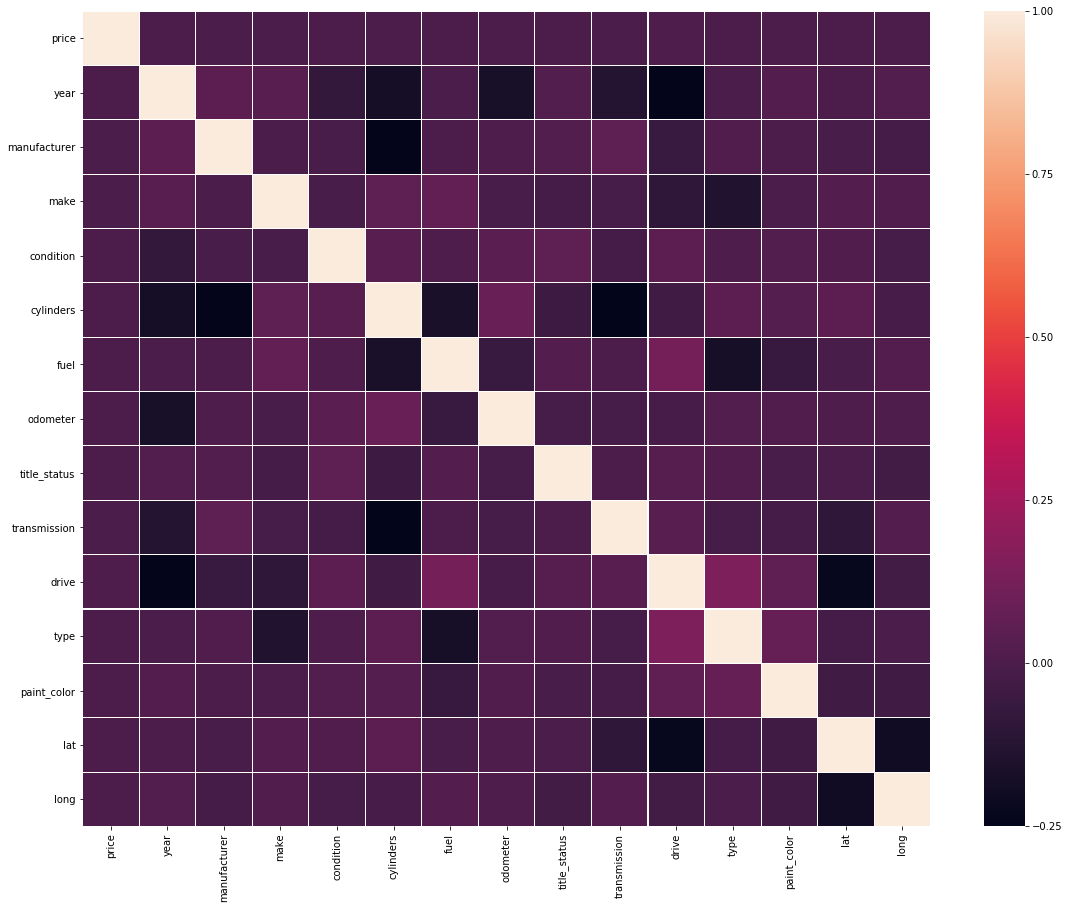

In [18]:
f,ax=plt.subplots(figsize=(19,15))
cor=nondata.corr()
sns.heatmap(cor,ax=ax,linewidth=0.1)